$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}$

# 27 Nonlinear Dimensionality Reduction with Digits Example

## Principal Components Analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import pickle

In [2]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/mnist.pkl.gz

--2017-04-18 08:51:54--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/mnist.pkl.gz
Resolving www.cs.colostate.edu... 129.82.45.114
Connecting to www.cs.colostate.edu|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: “mnist.pkl.gz.2”

100%[======================================>] 16,168,813  --.-K/s   in 0.1s    

2017-04-18 08:51:54 (106 MB/s) - “mnist.pkl.gz.2” saved [16168813/16168813]



In [3]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    # zero = train_set[0][1,:].reshape((28,28,1))
    # one = train_set[0][3,:].reshape((28,28,1))
    # two = train_set[0][5,:].reshape((28,28,1))
    # four = train_set[0][20,:].reshape((28,28,1))

X = train_set[0]
T = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

X.shape, Xtest.shape

((50000, 784), (10000, 784))

In [4]:
np.linalg.svd?

In [5]:
Xn = X - np.mean(X,axis=0)
U,S,V = np.linalg.svd(Xn, full_matrices=False)
V = V.T
V.shape

(784, 784)

In [6]:
S.shape

(784,)

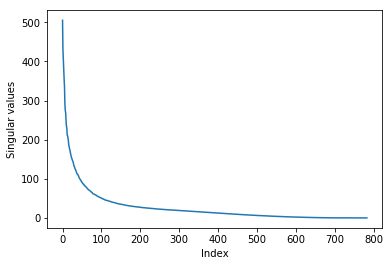

In [7]:
plt.plot(S)
plt.ylabel('Singular values')
plt.xlabel('Index')

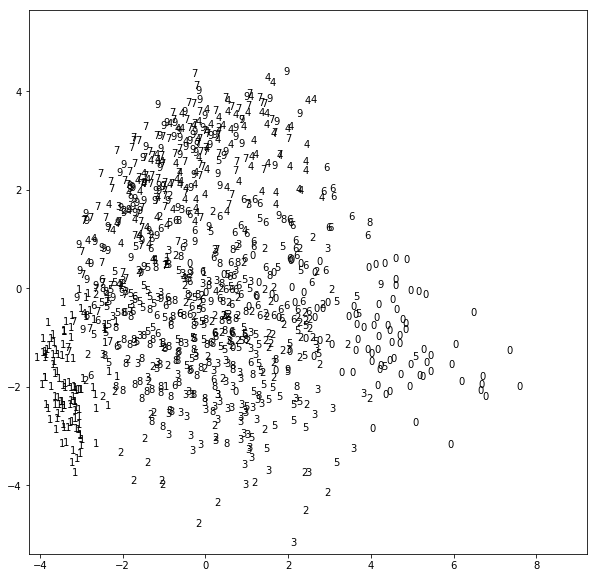

In [8]:
svs = [0,1]
Xproj = np.dot(Xn,V[:,svs])
plt.figure(figsize=(10,10))
for i in range(1000): #Xproj.shape[0]):
    #plt.plot(Xproj[i,0], Xproj[i,1],'.')
    plt.annotate(T[i,0],Xproj[i,:2],horizontalalignment='center',
        verticalalignment='center')
plt.xlim(np.min(Xproj[:,0]), np.max(Xproj[:,0]))
plt.ylim(np.min(Xproj[:,1]), np.max(Xproj[:,1]));

## Nonlinear Dimensionality Reduction with Bottleneck Network

In [9]:
import neuralnetworksbylayer as nn

In [10]:
nnet = nn.NeuralNetwork([784,50,20,10,2,10,20,50,784])
nnet.train(X,X,nIterations=5000,verbose=True)

SCG: Iteration 500 ObjectiveF=0.62465 Scale=1.000e-15 Time=0.17470 s/iter
SCG: Iteration 1000 ObjectiveF=0.60363 Scale=1.000e-15 Time=0.19397 s/iter
SCG: Iteration 1500 ObjectiveF=0.59337 Scale=1.000e-15 Time=0.19373 s/iter
SCG: Iteration 2000 ObjectiveF=0.58750 Scale=1.000e-15 Time=0.19290 s/iter
SCG: Iteration 2500 ObjectiveF=0.58383 Scale=1.000e-15 Time=0.19208 s/iter
SCG: Iteration 3000 ObjectiveF=0.58079 Scale=1.000e-15 Time=0.19406 s/iter
SCG: Iteration 3500 ObjectiveF=0.57809 Scale=1.000e-15 Time=0.19260 s/iter
SCG: Iteration 4000 ObjectiveF=0.57579 Scale=1.000e-15 Time=0.19445 s/iter
SCG: Iteration 4500 ObjectiveF=0.57381 Scale=1.000e-15 Time=0.19284 s/iter
SCG: Iteration 5000 ObjectiveF=0.57192 Scale=1.000e-15 Time=0.19411 s/iter


NeuralNetwork(TanhLayer(784,50),
              TanhLayer(50,20),
              TanhLayer(20,10),
              TanhLayer(10,2),
              TanhLayer(2,10),
              TanhLayer(10,20),
              TanhLayer(20,50),
              LinearLayer(50,784)
   Network was trained for 5000 iterations. Final error is 0.571919354272139.

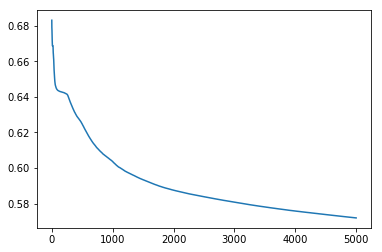

In [12]:
plt.plot(nnet.getErrorTrace())

In [13]:
nnet.layers

[TanhLayer(784,50),
 TanhLayer(50,20),
 TanhLayer(20,10),
 TanhLayer(10,2),
 TanhLayer(2,10),
 TanhLayer(10,20),
 TanhLayer(20,50),
 LinearLayer(50,784)]

In [16]:
bottle = nnet.layers[3].Y

In [17]:
bottle.shape

(50000, 2)

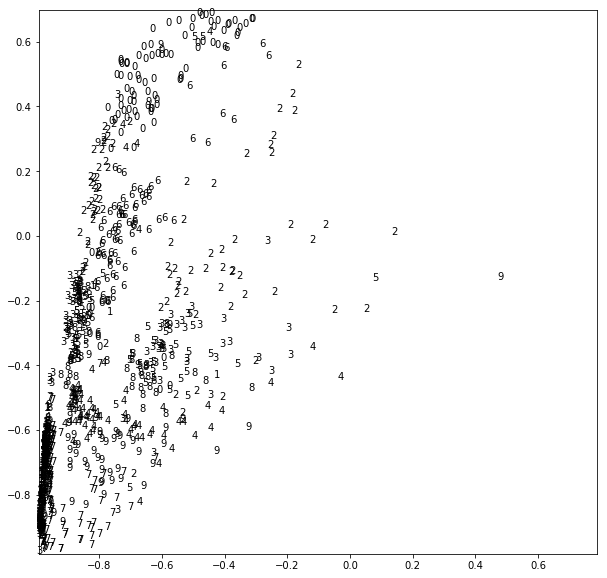

In [19]:
plt.figure(figsize=(10,10))
for i in range(1000): #Xproj.shape[0]):
    #plt.plot(Xproj[i,0], Xproj[i,1],'.')
    plt.annotate(T[i,0],bottle[i,:2],horizontalalignment='center',
        verticalalignment='center')
plt.xlim( np.min(bottle[:,0]), np.max(bottle[:,0]))
plt.ylim(np.min(bottle[:,1]), np.max(bottle[:,1]));

(-1.0, -0.4)

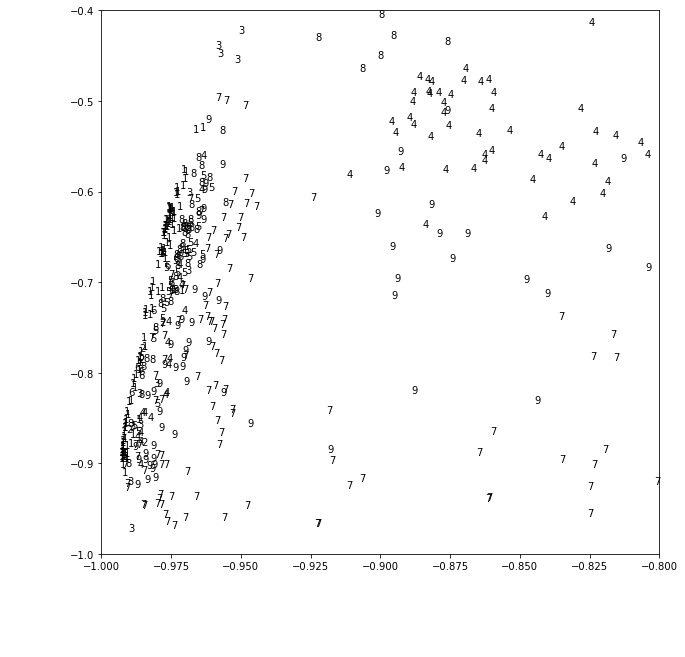

In [23]:
plt.figure(figsize=(10,10))
for i in range(1000): #Xproj.shape[0]):
    #plt.plot(Xproj[i,0], Xproj[i,1],'.')
    plt.annotate(T[i,0],bottle[i,:2],horizontalalignment='center',
        verticalalignment='center')
plt.xlim(-1.,-0.8)
plt.ylim(-1., -0.4)

Let's see where the test data is projected.

In [24]:
ytest = nnet.use(Xtest)

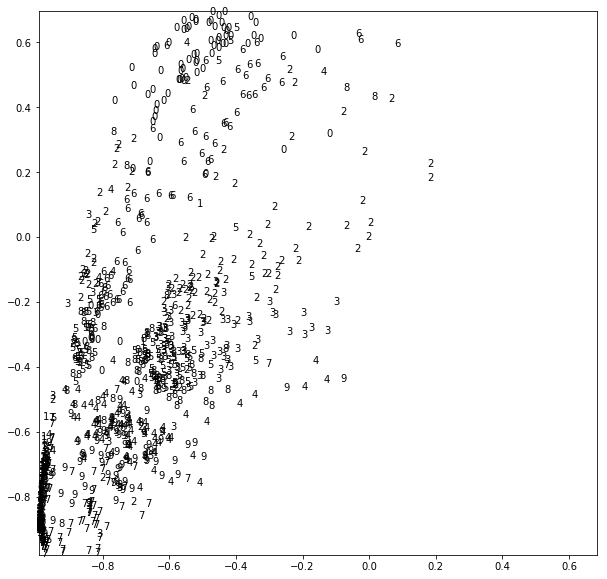

In [25]:
bottle = nnet.layers[3].Y
plt.figure(figsize=(10,10))
for i in range(1000): #Xproj.shape[0]):
    #plt.plot(Xproj[i,0], Xproj[i,1],'.')
    plt.annotate(Ttest[i,0],bottle[i,:2],horizontalalignment='center',
        verticalalignment='center')
plt.xlim( np.min(bottle[:,0]), np.max(bottle[:,0]))
plt.ylim(np.min(bottle[:,1]), np.max(bottle[:,1]));

Now what are all of those samples doing in the lower left corner?  Let's draw images for the samples in the most lower left, so ones for which the two bottleneck units produce the most negative outputs.

In [27]:
np.argsort?

In [28]:
sqDistFromOrigin = np.sum(bottle**2, axis=1)
ordered = np.argsort(-sqDistFromOrigin)

In [29]:
ordered.shape

(10000,)

In [30]:
ordered[:5]

array([8284,  124, 3308, 4742, 4225])

In [31]:
bottle[ordered[:5],:]

array([[-0.97689315, -0.97889975],
       [-0.97653481, -0.97670006],
       [-0.96823662, -0.97963459],
       [-0.98368014, -0.96124719],
       [-0.98389871, -0.95786954]])

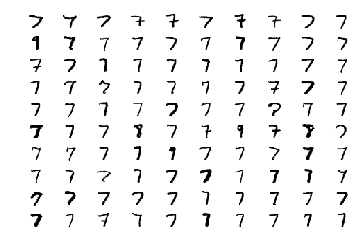

In [34]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(-Xtest[ordered[i],:].reshape((28,28)), interpolation='nearest', cmap='gray')
    plt.axis('off')